In [60]:
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from layout import Layout

plt.style.use("seaborn-notebook")

In [61]:
haltestellen = pd.read_csv("wienerlinien-ogd-haltestellen.csv", sep=";", index_col=0)
linien = pd.read_csv("wienerlinien-ogd-linien.csv", sep=";", index_col=0)
steige = pd.read_csv("wienerlinien-ogd-steige.csv", sep=";", index_col=0)

In [62]:
haltestellen

,TYP,DIVA,NAME,GEMEINDE,GEMEINDE_ID,WGS84_LAT,WGS84_LON,STAND
HALTESTELLEN_ID,,,,,,,,
214460106,stop,60200001,Schrankenberggasse,Wien,90001,48.173801,16.389807,NaN
214460107,stop,60200002,Achengasse,Wien,90001,48.284526,16.448898,NaN
214460108,stop,60200003,Ada-Christen-Gasse,Wien,90001,48.152866,16.385954,NaN
214460109,stop,60200004,Adam-Betz-Gasse,Wien,90001,48.215611,16.535191,NaN
214460110,stop,60200005,Adamovichgasse,Wien,90001,48.142167,16.337840,NaN
...,...,...,...,...,...,...,...,...
439929973,stop,60201924,Wildgartenallee,Wien,90001,48.159440,16.295646,NaN
528742125,stop,60201928,Altmannsdorfer Anger,Wien,90001,NaN,NaN,NaN
528848252,stop,60201928,Altmannsdorfer Anger,Wien,90001,NaN,NaN,NaN


In [63]:
steige

,FK_LINIEN_ID,FK_HALTESTELLEN_ID,RICHTUNG,REIHENFOLGE,RBL_NUMMER,BEREICH,STEIG,STEIG_WGS84_LAT,STEIG_WGS84_LON,STAND
STEIG_ID,,,,,,,,,,
214689748,214433691,214461074,H,1,4931.0,2.0,U3-H,48.211570,16.311438,NaN
214689749,214433691,214461382,H,2,4932.0,1.0,U3-H,48.204584,16.309076,NaN
214689750,214433691,214461121,H,3,4933.0,1.0,U3-H,48.199782,16.311366,NaN
214689751,214433691,214460711,H,4,4926.0,1.0,U3-H,48.197608,16.320053,NaN
214689752,214433691,214461278,H,5,4927.0,1.0,U3-H,48.197644,16.328614,NaN
...,...,...,...,...,...,...,...,...,...,...
532805470,214433689,214461353,R,12,4271.0,1.0,U2-R,48.219513,16.465607,NaN
532805471,214433689,214460404,R,13,4272.0,1.0,U2-R,48.222577,16.474941,NaN
532805472,214433689,214460592,R,14,4274.0,4.0,U2-R,48.233409,16.485684,NaN


In [64]:
G = nx.DiGraph()
paths = steige.groupby("FK_LINIEN_ID", sort=False)
for id, table in paths:
    path = table["FK_HALTESTELLEN_ID"]
    nx.add_path(G, path)

Alternatively without pandas:
```python
stops = dict()

with open('wienerlinien-ogd-haltestellen.csv', 'r') as stops_data:
    lines = stops_data.readlines()
    
for line in lines[1:]:
    stopId = line.strip().split(';')[0]
    stopName = line.strip().split(';')[3]
    stops[stopId] = stopName


transports = dict()

with open('wienerlinien-ogd-linien.csv', 'r') as transports_data:
    lines = transports_data.readlines()
    
for line in lines[1:]:
    transportId = line.strip().split(';')[0]
    transportName = line.strip().split(';')[1]
    transports[transportId] = transportName


paths = dict()
for i in transports:
    paths[i] = []
    
with open('wienerlinien-ogd-steige.csv', 'r') as paths_data:
    lines = paths_data.readlines()
    
for line in lines[1:]:
    transportID = line.strip().split(';')[1]
    transportStop = int(line.strip().split(';')[2])
    prev_stops = paths[transportID]
    prev_stops.append(transportStop)
    paths[transportID] = prev_stops


G = nx.DiGraph()
for path in paths.values():
    nx.add_path(G, path)
```

DiGraph with 1872 nodes and 4520 edges


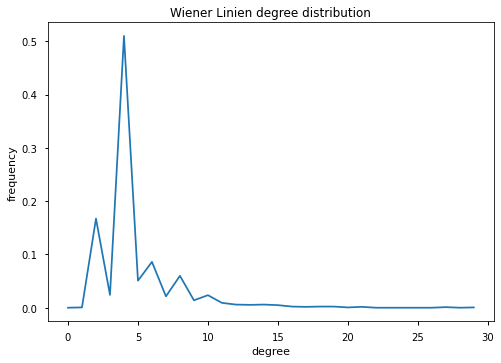

In [65]:
print(nx.info(G))

freqs = np.array(nx.degree_histogram(G)) / len(G)
plt.plot(np.arange(freqs.shape[0]), freqs)
plt.title("Wiener Linien degree distribution")
plt.xlabel("degree")
plt.ylabel("frequency")
plt.show()

In [66]:
pos = nx.spring_layout(G, dim=3)

In [67]:
node_names = [haltestellen.loc[node,"NAME"] for node in G]
node_colors = np.repeat([(31, 119, 180, 100)], repeats=G.number_of_nodes(), axis=0)
edge_colors = np.repeat([(255, 255, 255, 100)], repeats=G.number_of_edges(), axis=0)

In [68]:
graph = Layout(G, pos, node_names, node_colors, edge_colors)

In [69]:
graph.node_table

,x,y,z,r,g,b,a,name
0,0.574877,0.476360,0.538122,31,119,180,100,Ottakring
1,0.578278,0.421691,0.525398,31,119,180,100,Kendlerstraße
2,0.560805,0.376891,0.504895,31,119,180,100,Hütteldorfer Straße
3,0.553801,0.337936,0.521788,31,119,180,100,Johnstraße
4,0.514369,0.316351,0.530657,31,119,180,100,Schweglerstraße
...,...,...,...,...,...,...,...,...
1867,0.389793,0.721337,0.579491,31,119,180,100,Rosalia-Chladek-Gasse
1868,0.443419,0.507667,0.297691,31,119,180,100,Anastasius-Grün-Gasse
1869,0.510026,0.607699,0.482405,31,119,180,100,Alsegger Straße
1870,0.498169,0.617977,0.543145,31,119,180,100,Herbeckstraße


In [70]:
graph.edge_table

,i,j,r,g,b,a
0,0,1,255,255,255,100
1,0,92,255,255,255,100
2,0,91,255,255,255,100
3,0,0,255,255,255,100
4,0,1035,255,255,255,100
...,...,...,...,...,...,...
4515,1869,362,255,255,255,100
4516,1870,1871,255,255,255,100
4517,1870,1870,255,255,255,100
4518,1870,1869,255,255,255,100


In [71]:
# graph.preview()

In [72]:
graph.write()